In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data0 = [pd.read_csv("./oel_2b_rep1_alpha1_short.csv", encoding='utf-8', skiprows=0, header=0, sep=','),
         pd.read_csv("./oel_2b_rep2_alpha1_short.csv", encoding='utf-8', skiprows=0, header=0, sep=','),
         pd.read_csv("./oel_2b_rep3_alpha1_short.csv", encoding='utf-8', skiprows=0, header=0, sep=','),
          pd.read_csv("./oel_2b_rep4_alpha1_short.csv", encoding='utf-8', skiprows=0, header=0, sep=',')]
data1 = [pd.read_csv("./oel_2b_rep2_alpha1_long.csv", encoding='utf-8', skiprows=0, header=0, sep=','),
         pd.read_csv("./oel_2b_rep3_alpha1_long.csv", encoding='utf-8', skiprows=0, header=0, sep=','),
         pd.read_csv("./oel_2b_rep4_alpha1_long.csv", encoding='utf-8', skiprows=0, header=0, sep=',')]
data2 = [pd.read_csv("./oel_2b_rep3_alpha1_short.csv", encoding='utf-8', skiprows=0, header=0, sep=','),
         pd.read_csv("./oel_2b_rep3_alpha083_short.csv", encoding='utf-8', skiprows=0, header=0, sep=','),
         pd.read_csv("./oel_2b_rep3_alpha116_short.csv", encoding='utf-8', skiprows=0, header=0, sep=',')]
data3 = [pd.read_csv("./oel_2b_rep3_alpha116_longlong.csv", encoding='utf-8', skiprows=0, header=0, sep=',')]

In [3]:
# Set constant value
g = 1.0
m = [1.0, 1e-3]

In [4]:
# Calculate longitude of perihelion error
def calc_error_lperi(df_list):
    for df in df_list:
        n_init = math.sqrt(g * (m[0]+m[1]) / df['sa0'][0] ** 3.0)
        p_init = 2.0 * math.pi / n_init
        lperi_init = df['peri0'][0] + df['node0'][0]
        error_lperi_list = []
        for index, row in df.iterrows():
            error_lperi = row['peri0'] + row['node0'] - lperi_init
            if error_lperi > math.pi:
                error_lperi -= 2.0 * math.pi
            elif error_lperi < -math.pi:
                error_lperi += 2.0 * math.pi
            error_lperi_list.append(error_lperi)
        df['error_lperi0'] = error_lperi_list

In [5]:
calc_error_lperi(data0)
calc_error_lperi(data1)
calc_error_lperi(data2)
calc_error_lperi(data3)

In [6]:
# Calculate Time of perihelion passage
def calc_tpp(df_list):
    for df in df_list:
        n_init = math.sqrt(g * (m[0]+m[1]) / df['sa0'][0] ** 3.0)
        p_init = 2.0 * math.pi / n_init
        tpp_list = []
        for index, row in df.iterrows():
            if row['sa0'] < 0:
                print(row['sa0'])
            n = math.sqrt(g * (m[0]+m[1]) / row['sa0'] ** 3.0)
            tpp =  math.fmod((row['t'] - row['l0'] / n), p_init)
            if tpp < 0:
                tpp += p_init
            tpp_list.append(tpp)
        df['tpp0'] = tpp_list

In [7]:
calc_tpp(data0)
calc_tpp(data1)
calc_tpp(data2)
calc_tpp(data3)

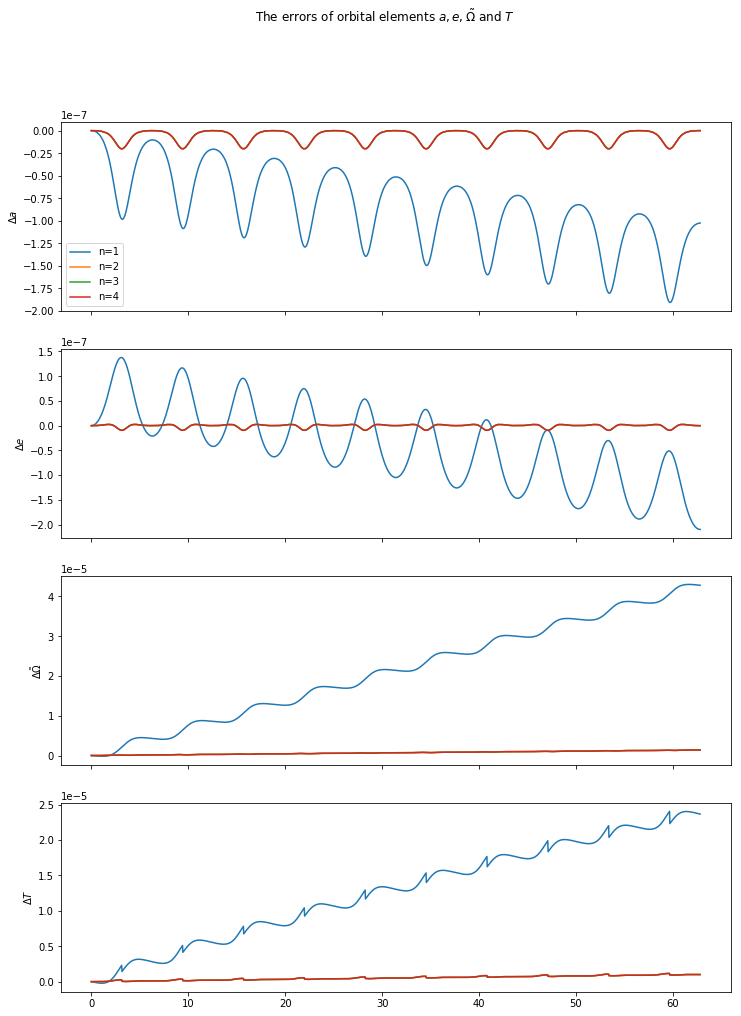

In [8]:
# The errors of orbital elements, of the P(EC)^n Hermite scheme against time for 10 orbital periods.

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 16))
fig.suptitle("The errors of orbital elements $a, e, \\tilde{\Omega}$ and $T$")

axes[0].plot(data0[0]['t'], data0[0]['sa0'] - data0[0]['sa0'][0], label='n=1')
axes[0].plot(data0[1]['t'], data0[1]['sa0'] - data0[1]['sa0'][0], label='n=2')
axes[0].plot(data0[2]['t'], data0[2]['sa0'] - data0[2]['sa0'][0], label='n=3')
axes[0].plot(data0[3]['t'], data0[3]['sa0'] - data0[3]['sa0'][0], label='n=4')
axes[0].set_ylabel('$\Delta{a}$')
axes[0].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))
axes[0].legend();

axes[1].plot(data0[0]['t'], data0[0]['oe0'] - data0[0]['oe0'][0])
axes[1].plot(data0[1]['t'], data0[1]['oe0'] - data0[1]['oe0'][0])
axes[1].plot(data0[2]['t'], data0[2]['oe0'] - data0[2]['oe0'][0])
axes[1].plot(data0[3]['t'], data0[3]['oe0'] - data0[3]['oe0'][0])
axes[1].set_ylabel('$\Delta{e}$')
axes[1].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[2].plot(data0[0]['t'], data0[0]['error_lperi0'])
axes[2].plot(data0[1]['t'], data0[1]['error_lperi0'])
axes[2].plot(data0[2]['t'], data0[2]['error_lperi0'])
axes[2].plot(data0[3]['t'], data0[3]['error_lperi0'])
axes[2].set_ylabel('$\Delta{\\tilde{\Omega}}$')
axes[2].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[3].plot(data0[0]['t'], data0[0]['tpp0'] - data0[0]['tpp0'][0])
axes[3].plot(data0[1]['t'], data0[1]['tpp0'] - data0[1]['tpp0'][0])
axes[3].plot(data0[2]['t'], data0[2]['tpp0'] - data0[2]['tpp0'][0])
axes[3].plot(data0[3]['t'], data0[3]['tpp0'] - data0[3]['tpp0'][0])
axes[3].set_ylabel('$\Delta{T}$')
axes[3].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

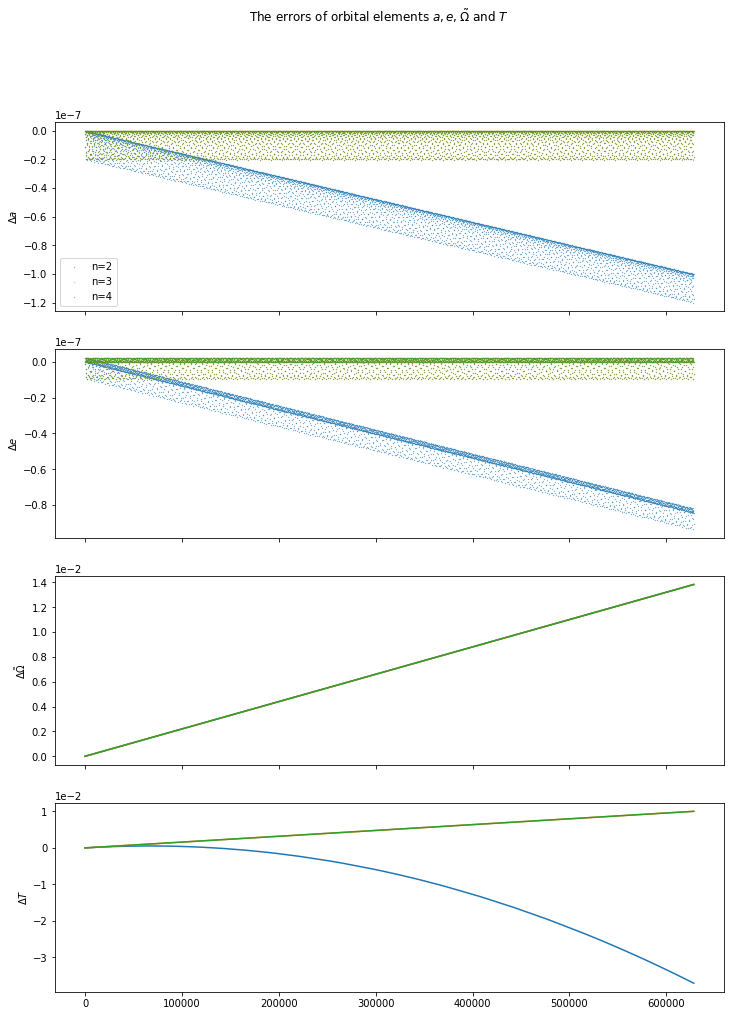

In [9]:
# The errors of orbital elements, of the P(EC)^n Hermite scheme against time for 1e5 orbital periods.

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 16))
fig.suptitle("The errors of orbital elements $a, e, \\tilde{\Omega}$ and $T$")

axes[0].plot(data1[0]['t'], data1[0]['sa0'] - data1[0]['sa0'][0], ls='none', marker='.', ms=0.5, label='n=2')
axes[0].plot(data1[1]['t'], data1[1]['sa0'] - data1[1]['sa0'][0], ls='none', marker='.', ms=0.5, label='n=3')
axes[0].plot(data1[2]['t'], data1[2]['sa0'] - data1[2]['sa0'][0], ls='none', marker='.', ms=0.5, label='n=4')
axes[0].set_ylabel('$\Delta{a}$')
axes[0].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))
axes[0].legend();

axes[1].plot(data1[0]['t'], data1[0]['oe0'] - data1[0]['oe0'][0], ls='none', marker='.', ms=0.5)
axes[1].plot(data1[1]['t'], data1[1]['oe0'] - data1[1]['oe0'][0], ls='none', marker='.', ms=0.5)
axes[1].plot(data1[2]['t'], data1[2]['oe0'] - data1[2]['oe0'][0], ls='none', marker='.', ms=0.5)
axes[1].set_ylabel('$\Delta{e}$')
axes[1].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[2].plot(data1[0]['t'], data1[0]['error_lperi0'])
axes[2].plot(data1[1]['t'], data1[1]['error_lperi0'])
axes[2].plot(data1[2]['t'], data1[2]['error_lperi0'])
axes[2].set_ylabel('$\Delta{\\tilde{\Omega}}$')
axes[2].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[3].plot(data1[0]['t'], data1[0]['tpp0'] - data1[0]['tpp0'][0])
axes[3].plot(data1[1]['t'], data1[1]['tpp0'] - data1[1]['tpp0'][0])
axes[3].plot(data1[2]['t'], data1[2]['tpp0'] - data1[2]['tpp0'][0])
axes[3].set_ylabel('$\Delta{T}$')
axes[3].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

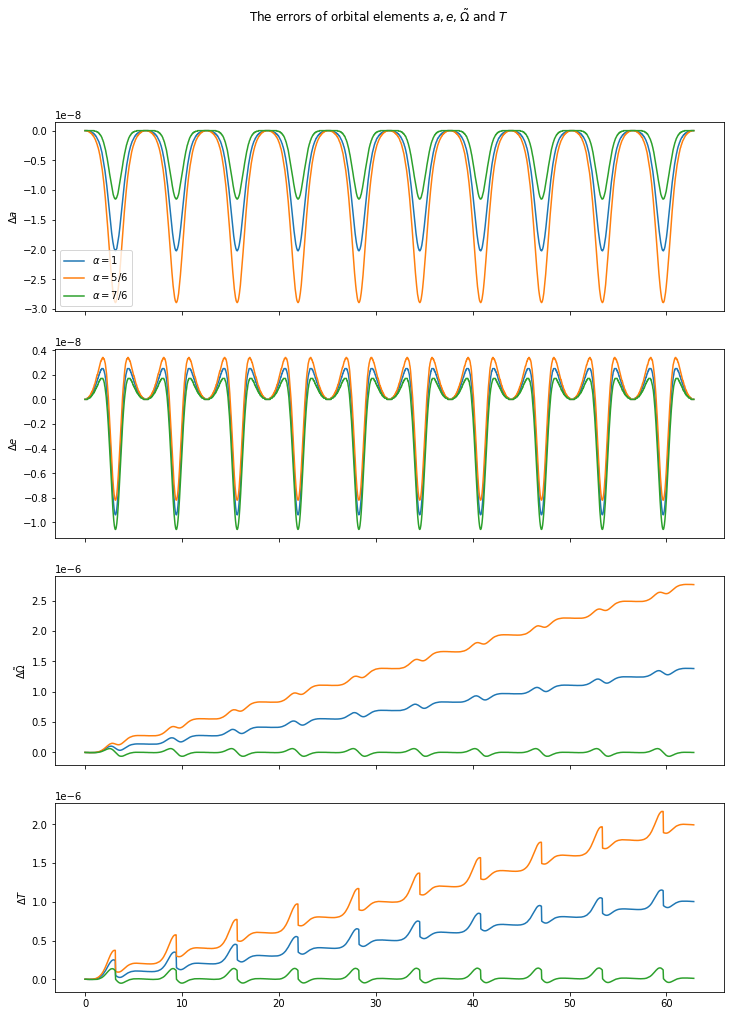

In [10]:
# The errors of the Hermite integrator with alpha = 5/6, 1, 7/6

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 16))
fig.suptitle("The errors of orbital elements $a, e, \\tilde{\Omega}$ and $T$")

axes[0].plot(data2[0]['t'], data2[0]['sa0'] - data2[0]['sa0'][0], label='$\\alpha=1$')
axes[0].plot(data2[1]['t'], data2[1]['sa0'] - data2[1]['sa0'][0], label='$\\alpha=5/6$')
axes[0].plot(data2[2]['t'], data2[2]['sa0'] - data2[2]['sa0'][0], label='$\\alpha=7/6$')
axes[0].set_ylabel('$\Delta{a}$')
axes[0].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))
axes[0].legend();

axes[1].plot(data2[0]['t'], data2[0]['oe0'] - data2[0]['oe0'][0])
axes[1].plot(data2[1]['t'], data2[1]['oe0'] - data2[1]['oe0'][0])
axes[1].plot(data2[2]['t'], data2[2]['oe0'] - data2[2]['oe0'][0])
axes[1].set_ylabel('$\Delta{e}$')
axes[1].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[2].plot(data2[0]['t'], data2[0]['error_lperi0'])
axes[2].plot(data2[1]['t'], data2[1]['error_lperi0'])
axes[2].plot(data2[2]['t'], data2[2]['error_lperi0'])
axes[2].set_ylabel('$\Delta{\\tilde{\Omega}}$')
axes[2].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[3].plot(data2[0]['t'], data2[0]['tpp0'] - data2[0]['tpp0'][0])
axes[3].plot(data2[1]['t'], data2[1]['tpp0'] - data2[1]['tpp0'][0])
axes[3].plot(data2[2]['t'], data2[2]['tpp0'] - data2[2]['tpp0'][0])
axes[3].set_ylabel('$\Delta{T}$')
axes[3].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

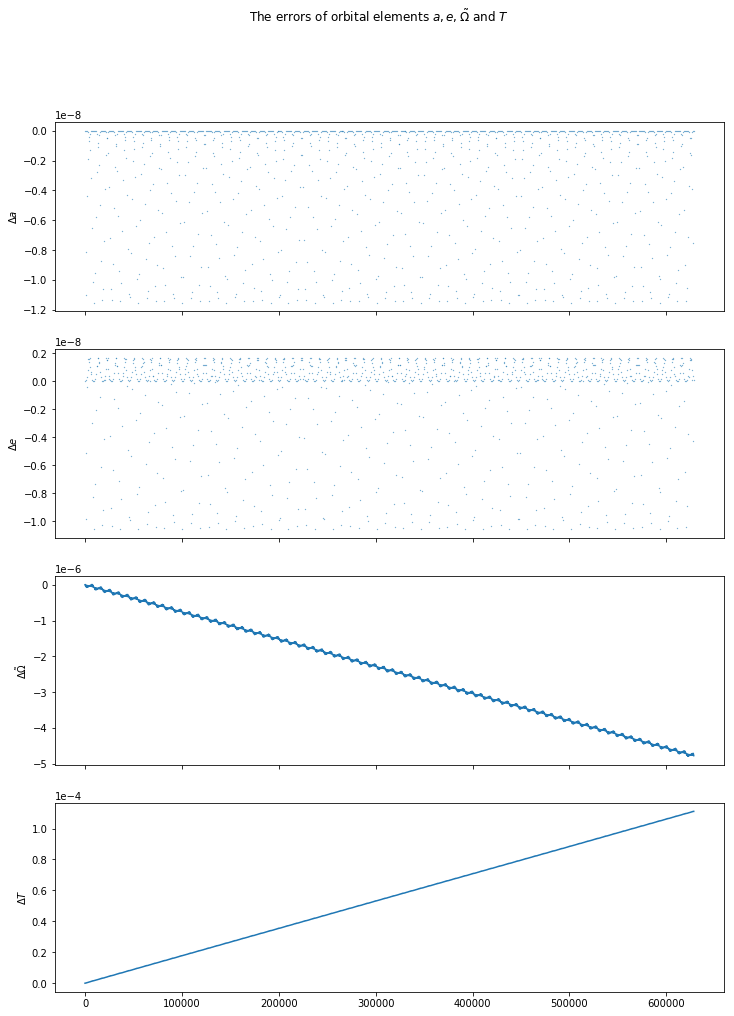

In [11]:
# The errors for the hermite integrator with alpha = 7/6

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 16))
fig.suptitle("The errors of orbital elements $a, e, \\tilde{\Omega}$ and $T$")

axes[0].plot(data3[0]['t'], data3[0]['sa0'] - data3[0]['sa0'][0], ls='none', marker='.', ms=0.5)
axes[0].set_ylabel('$\Delta{a}$')
axes[0].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[1].plot(data3[0]['t'], data3[0]['oe0'] - data3[0]['oe0'][0], ls='none', marker='.', ms=0.5)
axes[1].set_ylabel('$\Delta{e}$')
axes[1].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[2].plot(data3[0]['t'], data3[0]['error_lperi0'])
axes[2].set_ylabel('$\Delta{\\tilde{\Omega}}$')
axes[2].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))

axes[3].plot(data3[0]['t'], data3[0]['tpp0'] - data3[0]['tpp0'][0])
axes[3].set_ylabel('$\Delta{T}$')
axes[3].ticklabel_format(style="sci",  axis="y", scilimits=(0,0))